<a href="https://colab.research.google.com/github/Devanaa1999/Binar-Challange/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Devanaa1999/NeuralNetwork/

Cloning into 'NeuralNetwork'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 18 (delta 8), reused 11 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 38.46 MiB | 17.02 MiB/s, done.
Resolving deltas: 100% (8/8), done.
Updating files: 100% (9/9), done.


In [2]:
!git clone https://github.com/nuradilahf/feature-extraction

Cloning into 'feature-extraction'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 8 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (8/8), 1.01 MiB | 7.29 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [8]:
import pandas as pd

# Membaca file train.csv dan valid.csv
df_train = pd.read_csv('/content/feature-extraction/clean.csv')
df_valid = pd.read_csv('/content/feature-extraction/train_data.csv')

# Menggabungkan df_train dan df_valid menggunakan pd.concat
df = pd.concat([df_train, df_valid], ignore_index=True)

# Membaca file test.csv
df_test = pd.read_csv('/content/feature-extraction/test_data.csv')

# Menggabungkan df dengan df_test menggunakan pd.concat
df = pd.concat([df, df_test], ignore_index=True)

In [9]:
df.head()

,Unnamed: 0,Text,Text_Bersih,Sentiment,0,1,2
0,0.0,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,NaN,NaN,NaN
1,1.0,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus dan k212 mmbri hujjah pak ai...,neutral,NaN,NaN,NaN
2,2.0,lokasi strategis di jalan sumatera bandung . t...,lokasi strategis di jalan sumatra bandung temp...,positive,NaN,NaN,NaN
3,3.0,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unboxing pake...,positive,NaN,NaN,NaN
4,4.0,duh . jadi mahasiswa jangan sombong dong . kas...,aduh jadi mahasiswa jangan sombong dong kasih ...,negative,NaN,NaN,NaN


In [10]:
df.shape

(32799, 7)

In [15]:
df.Sentiment.value_counts()

,count
Sentiment,
positive,15038
negative,7995
neutral,2700


In [23]:
import re

def cleansing(sent):
    # Check if sent is a string before applying lower()
    if isinstance(sent, str):
        # Mengubah seluruh teks menjadi huruf kecil
        string = sent.lower()
        # Menghapus karakter selain huruf dan angka, menggantinya dengan spasi
        string = re.sub(r'[^a-zA-Z0-9]', ' ', string)
        return string
    else:
        # Handle non-string values, e.g., return an empty string or NaN
        return ''  # Or return float('nan') to keep track of missing values

df['text_clean'] = df['Text_Bersih'].apply(cleansing)

In [24]:
df.head()

,Unnamed: 0,Text,Text_Bersih,Sentiment,0,1,2,text_clean
0,0.0,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,NaN,NaN,NaN,warung ini dimiliki oleh pengusaha pabrik tahu...
1,1.0,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus dan k212 mmbri hujjah pak ai...,neutral,NaN,NaN,NaN,mohon ulama lurus dan k212 mmbri hujjah pak ai...
2,2.0,lokasi strategis di jalan sumatera bandung . t...,lokasi strategis di jalan sumatra bandung temp...,positive,NaN,NaN,NaN,lokasi strategis di jalan sumatra bandung temp...
3,3.0,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unboxing pake...,positive,NaN,NaN,NaN,betapa bahagia nya diri ini saat unboxing pake...
4,4.0,duh . jadi mahasiswa jangan sombong dong . kas...,aduh jadi mahasiswa jangan sombong dong kasih ...,negative,NaN,NaN,NaN,aduh jadi mahasiswa jangan sombong dong kasih ...


In [30]:
# Assuming your target variable column is named 'Sentiment', change the code to:
neg_label = df.loc[df['Sentiment'] == 'negative'].Sentiment.tolist()
neu_label = df.loc[df['Sentiment'] == 'neutral'].Sentiment.tolist()
pos_label = df.loc[df['Sentiment'] == 'positive'].Sentiment.tolist()

# The following lines are incorrect as 'target_variable' column doesn't exist
# Remove or comment them out
#neg_label = df.loc[df['Sentiment'] == 'negative'].target_variable.tolist()
#neu_label = df.loc[df['Sentiment'] == 'neutral'].target_variable.tolist()
#pos_label = df.loc[df['Sentiment'] == 'positive'].target_variable.tolist()

In [31]:
total_data = pos + neu + neg
labels = pos_label + neu_label + neg_label

print("Pos: %s, Neu: %s, Neg: %s" % (len(pos), len(neu), len(neg)))
print("Total data: %s" % len(total_data))

Pos: 15038, Neu: 2700, Neg: 7995
Total data: 25733


In [32]:
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import defaultdict

max_features = 100000
tokenizer = Tokenizer(num_words=max_features, split=' ', lower=True)
tokenizer.fit_on_texts(total_data)

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("tokenizer.pickle has created!")

X = tokenizer.texts_to_sequences(total_data)
vocab_size = len(tokenizer.word_index)
maxlen = max(len(x) for x in X)

X = pad_sequences(X)
with open('x_pad_sequences.pickle', 'wb') as handle:
    pickle.dump(X, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("x_pad_sequences.pickle has created!")


tokenizer.pickle has created!
x_pad_sequences.pickle has created!


In [33]:
Y = pd.get_dummies(labels)
Y = Y.values

with open('y_labels.pickle', 'wb') as handle:
    pickle.dump(Y, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("y_labels.pickle has created!")


y_labels.pickle has created!


In [34]:
from sklearn.model_selection import train_test_split

# Load X data
file = open("x_pad_sequences.pickle", 'rb')
X = pickle.load(file)
file.close()

# Load Y data
file = open("y_labels.pickle", 'rb')
Y = pickle.load(file)
file.close()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


In [35]:
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.layers import Flatten
from tensorflow.keras import backend as K


In [36]:
embed_dim = 100

model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test), verbose=1, callbacks=[es])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 351s 169ms/step - accuracy: 0.6475 - loss: 0.4786 - val_accuracy: 0.7117 - val_loss: 0.3991
Epoch 2/10
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 344s 167ms/step - accuracy: 0.7342 - loss: 0.3639 - val_accuracy: 0.7161 - val_loss: 0.3954
Epoch 3/10
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 381s 166ms/step - accuracy: 0.7570 - loss: 0.3273 - val_accuracy: 0.7140 - val_loss: 0.4251
Epoch 3: early stopping


In [37]:
from sklearn import metrics

predictions = model.predict(X_test)
y_pred = predictions

matrix_test = metrics.classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Testing selesai")
print(matrix_test)


161/161 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step
Testing selesai
              precision    recall  f1-score   support

           0       0.79      0.38      0.52      1578
           1       0.84      0.29      0.44       534
           2       0.69      0.96      0.81      3035

    accuracy                           0.71      5147
   macro avg       0.78      0.55      0.59      5147
weighted avg       0.74      0.71      0.68      5147



In [3]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import KFold

# Assuming you want to use the y loaded in previous cell, you can comment out Y assignment
# Otherwise define Y here.
# Y = ...

kf = KFold(n_splits=5, random_state=42, shuffle=True)

accuracies = []

# If you want y to be assigned to the Y loaded in previous cell, use y directly:
y = y  # No change needed as y was already loaded in previous cells.
# This will keep y as (25733, 3) array

#If you want to redefine Y or want to keep y and Y separate, assign a value or array to Y.
#Example:
#Y = np.array(...)
#y = Y #If you want to assign the value of Y to y

embed_dim = 100

In [7]:
for iteration, data in enumerate(kf.split(X), start=1):
    data_train = X[data[0]]
    target_train = y[data[0]]

    data_test = X[data[1]]
    target_test = y[data[1]]

    # Ensure Sequential, Embedding, and layers are imported in this cell as well
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Embedding
    from tensorflow.keras import layers # Import layers here

    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=maxlen))
    model.add(layers.Conv1D(128, 5, activation='relu')) # Now layers is accessible
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=0)
    history = model.fit(data_train, target_train, epochs=10, batch_size=10, validation_data=(data_test, target_test), verbose=0, callbacks=[es])

    predictions = model.predict(data_test)
    y_pred = predictions

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


In [9]:
for iteration, data in enumerate(kf.split(X), start=1):
    # ... (rest of the code remains the same)
    predictions = model.predict(data_test)
    y_pred = predictions

    # Calculate and print accuracy and classification report inside the loop:
    accuracy = accuracy_score(target_test.argmax(axis=1), y_pred.argmax(axis=1))

    print("Training ke-", iteration)
    print(classification_report(target_test.argmax(axis=1), y_pred.argmax(axis=1)))
    print("=============================================")

    accuracies.append(accuracy)

# Calculate average accuracy outside the loop:
average_accuracy = np.mean(accuracies)

print()
print()
print()
print("Rata-rata Accuracy: ", average_accuracy)

161/161 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step
Training ke- 1
              precision    recall  f1-score   support

           0       0.79      0.36      0.49      1673
           1       0.87      0.27      0.42       526
           2       0.67      0.96      0.79      2947

    accuracy                           0.69      5146
   macro avg       0.78      0.53      0.57      5146
weighted avg       0.73      0.69      0.65      5146

161/161 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step
Training ke- 2
              precision    recall  f1-score   support

           0       0.79      0.36      0.49      1673
           1       0.87      0.27      0.42       526
           2       0.67      0.96      0.79      2947

    accuracy                           0.69      5146
   macro avg       0.78      0.53      0.57      5146
weighted avg       0.73      0.69      0.65      5146

161/161 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step
Training ke- 3
              precision    recall  f1-score   support

           0

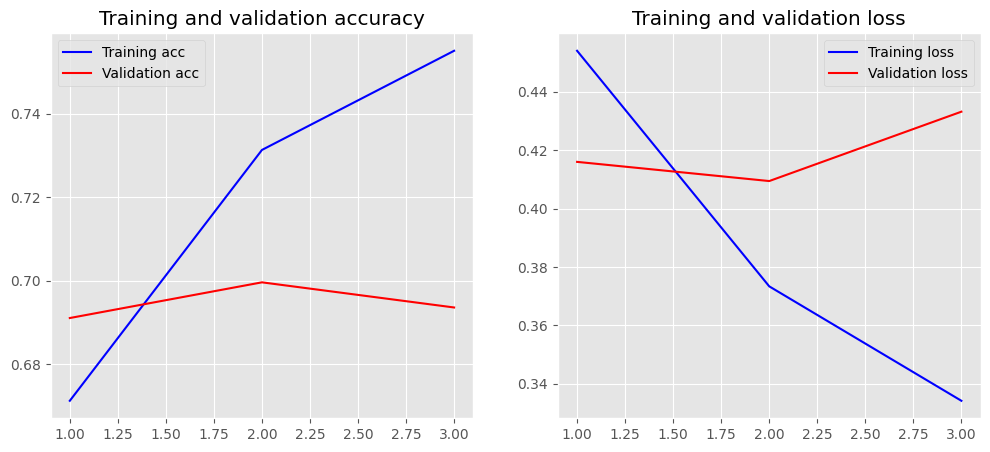

In [14]:
# history.history
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Plot Training and Validation Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    # Plot Training and Validation Loss
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

# Use the function
%matplotlib inline
plot_history(history)


In [15]:
model.save('model.h5')
print("Model has created!")


Model has created!
